<img src="../../Img/backdrop-wh.png" alt="Drawing" style="width: 300px;"/>

# Sentiment Analysis

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Understand the goal of sentiment analysis.
* Use VADER to conduct sentiment analyses.
* Think critically on how sentiment analysis can be used to interrogate a dataset.
* Critique sentiment analysis models, and assess their failure modes.
</div>

### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
💭 **Reflection:** Reflecting on ethical implications, biases, and social impact in data science.

### Sections
1. [What is Sentiment Analysis?](#sentiment_analysis)
2. [Using VADER to Conduct Sentiment Analysis](#vader)
3. [Sentiment Analysis on Reddit Data](#vader_reddit)
4. [Using Sentiment Analysis to Interrogate Your Data](#analysis)
5. [Demo: Sentiment Analysis with spaCy and TextBlob](#demo1)

<a id='sentiment_analysis'></a>

# What is Sentiment Analysis?

Language can convey nuanced ideas, feelings, and emotions. As humans, we're very good at extracting the underlying emotional state expressed by a text. We do this all the time, including:

- Figuring out if someone liked or disliked a product in a review,
- Understanding whether a colleague is upset or not in an email,
- Reading an editorial and discerning an author's position on a topic.

Can we computationally make these assessments? **Sentiment Analysis** is a task where we aim to characterize the underlying emotional state expressed by a given text.

Let's consider a toy example:

```
"This was the best service! Would love to come again!"
```

🔔 **Question**: This is very clearly expressing **positive sentiment**. How did we make that judgement?

## Sentiment Analysis on Reddit: A Close Reading

On a subreddit like AITA, the manner in which the OP expresses sentiment on the involved parties influences how commenters interpret and ultimately vote on the situation. Expressions of sentiment reflect the norms carried by the community under study.

Let's take a look at some example comments. First, we import the dataset:

In [14]:
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd

%matplotlib inline

In [15]:
df = pd.read_csv('../../data/aita_pp.csv')

🔔 **Question**: Take a look at the following submissions.

- What sentiments are expressed by each post?
- Can you distill that sentiment down to an "overall sentiment" for that post?
- Do posts fall neatly within the scope of "positive" or "negative" sentiment?
- What nuances do you lose by choosing to represent the text in this way?

In [16]:
print(df['selftext'].iloc[463])

I work for a major retailer near a big city. Recently we hired a new kid named Chuck. Chuck is great. Chuck does their job, shows up on time, and is pleasant to be around. If you’ve ever worked retail you know not many people can check these 3 basic boxes. 

A couple months after being hired Chuck began asking people to not use him, he, bro, sir, etc when we referring to Chuck. Cool, no big deal, I’m down for respecting that sort of thing and I imagine it was super tough to tell someone let alone 30 plus people. Chuck is unsure if they are asexual or possibly even trans but knows they no longer want to be referred to with a male gendered pronoun. 

So this was fine at first but has been becoming more difficult as time has wore on. It’s a daily struggle to drop man, sir, and bro from my phrases and mannerisms. And I feel terrible every time. Chuck just gives me this look until I realize that I’ve done it again, which I then apologize for again, and repeat ad nauseam. 

I’m not alone in 

In [17]:
print(df['selftext'].iloc[191])

I run a medium sized chain of local gyms that I started with my father in 2002. Dad passed away four years ago. I have a younger blood brother and a younger blood sister who each have management like roles in my business. My brother in law is also involved.

I like keeping things in the family, i can trust them and though things have been hard we make it through together.

However, I also have another, unofficially adopted "brother" that is now 22 and wants to be involved in my business. I gave him a part time position as a receptionist, in addition to allowing him to advertise his failing personal trainer business at my gyms.

The story is my mother was very religious, and giving. She would cry over a fly getting swatted. She had a best friend who had drug problems, with a four year old who she couldnt support. The plan was that my family would foster him until she got back on her feet. She ditched him and left him with us and we've taken care of him ever since.

He was an unruly, rud

In [18]:
print(df['selftext'].iloc[687])

I’m a woodworker on the side, I made my best friend a wooden American flag because he said he would love one. Only charged him cost of materials and shipping cost around $20. He then asked me to make another flag for a gift for his mom. I still gave it to him for cheap because growing up I was close with his family, but now he asked me to make the same flags for 5 other people in his family and one coworker. Keep in mind I sell these size flags for $150 and he assumed this time it would still be $20 each flag. I promptly told him I can’t do that cost anymore, it was only really a deal for him because he is my best friend and I agreed to it the second time bc it was for his mom but now these are for people I don’t even no. Told him I’m sorry but it’s not gonna happen. He responded “oh, ok...” and it’s been weird ever since, really short. Should I have just done it and not risk ruining our friendship?

Update: followed some advice on here and let him know I’m not upset but broke down wha

<a id='vader'></a>

# Using VADER to Conduct Sentiment Analysis

There are several ways to approach sentiment analysis using natural language processing tools. One of the most commonly used tools is called **VADER** (Valence Aware Dictionary and sEntiment Reasoner).

As far as sentiment analyzers go, VADER is pretty simple: it has a dictionary of many words and their associated sentiment (e.g., "bad" is negative sentiment, "happy" is positive sentiment) and combines these sentiments into "scores".

Let's import VADER and see how it works:

In [19]:
# Import VADER if necessary
%pip install vadersentiment

Note: you may need to restart the kernel to use updated packages.


From the package `vadersentiment`, we import something called the `SentimentIntensityAnalyzer`.

⚠️ **Warning:** `SentimentIntensityAnalyzer` is not a function we can run to calculate sentiment. It's similar to `TFIDFVectorizer`: we first **instantiate** it into an **object**, and then use that object to analyze the text.

Let's create an object called `analyzer` using `SentimentIntensityAnalyzer`:

In [20]:
# Import the VADER SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Create analyzer object
analyzer = SentimentIntensityAnalyzer()

Now, we use a **method** called `polarity_scores` to calculate sentiment:

In [21]:
analyzer.polarity_scores("This was the best service! Would love to come again!")

{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.8745}

VADER separately provides measures of **positive**, **neutral**, and **negative** sentiment. VADER also provides a `compound` score which synthesizes all three into a single measure of sentiment.

🔔 **Question**: Do the numbers here match your assessment of the sentiment?

💡 **Tip**: VADER provides [recommendations](https://vadersentiment.readthedocs.io/en/latest/pages/about_the_scoring.html) on how to use the `compound` score as a single measure of sentiment:

1. Positive sentiment: `compound` $\geq 0.5$
2. Neutral sentiment: $-0.5 <$ `compound` $<0.5$
3. Negative sentiment: `compound` $\leq -0.5$

⚠️ **Warning:** No sentiment analyzer is perfect. Try different examples in VADER to see where it might make errors. How does it handle sarcasm, or convoluted text?

Consider the following example:

In [22]:
analyzer.polarity_scores("I am not happy.")

{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound': -0.4585}

Seems pretty accurate. What about this sentence, which says the same thing, but in a more confusing way?

In [23]:
analyzer.polarity_scores("It is not the case that I am happy.")

{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.5719}

The takeaway here is not that we have to abandon VADER as a tool. Like all computational tools, it has its limits. We need to be aware of these limits, especially when the usage of these tools impacts our beliefs and actions.

<a id='vader_reddit'></a>

# Sentiment Analysis on Reddit Data

Let's try applying the sentiment analyzer to the Reddit data. First, let's apply it to the three posts we considered above:

In [24]:
print(analyzer.polarity_scores(df['selftext'].iloc[463]))
print(analyzer.polarity_scores(df['selftext'].iloc[191]))
print(analyzer.polarity_scores(df['selftext'].iloc[687]))

{'neg': 0.141, 'neu': 0.79, 'pos': 0.069, 'compound': -0.9755}
{'neg': 0.073, 'neu': 0.85, 'pos': 0.077, 'compound': 0.3833}
{'neg': 0.027, 'neu': 0.818, 'pos': 0.155, 'compound': 0.9958}


🔔 **Question**: Do you agree with how VADER characterized these post? 

Ultimately, like most natural language processing tasks, there is no real **ground truth**: the answer is subjective.

### Characterizing Sentiment at Scale

We've looked at posts one by one, but what if we want to calculate sentiment on our entire dataset?

⚠️ **Warning:** If we pass in the entire list of posts to `polarity_scores`, VADER will calculate the sentiment on the **whole** dataset. We have to use the function one post at a time.

We will need to use a **for loop** to perform this repeated computation. Let's think through how to do this:

- We iterate through every selftext in the dataset
- For each selftext, we calculate each sentiment. We'll focus on the compound score, for simplicity.
- We store the score in a data structure. Let's use a list.

In [25]:
# Create list to store scores
compound_scores = []

In [26]:
# This may take a few minutes to run

# Iterate through the selftext of each post
for post in df['selftext']:
    # Calculate sentiment
    sentiment = analyzer.polarity_scores(post)
    # Store each score
    compound_scores.append(sentiment['compound'])

In [27]:
# Store the compound scores in the dataframe
df['sentiment'] = compound_scores

Let's take a look at the distribution of sentiment. What do you observe?

Text(0, 0.5, 'Frequency')

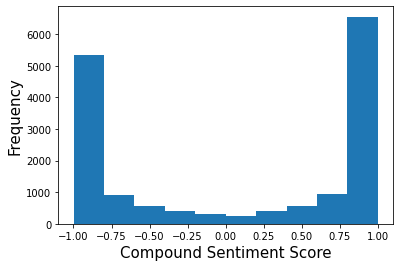

In [28]:
df['sentiment'].hist(grid=False)
plt.xlabel('Compound Sentiment Score', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

<a id='analysis'></a>

# Using Sentiment Analysis to Interrogate Your Data

In the literature, most papers on sentiment analysis are concerned with the task itself: Can we build a better model to conduct sentiment analysis? How good is the model? Comparatively less papers actually leverage sentiment analysis to understand norms about society. 

💭 **Reflection:** Why is there so much focus on improving models, and less usage of these models to critically examine corpora? What value structures are in place to incentivize this kind of research?

Let's use sentiment analysis to try and better understand this dataset and community. To do so, we need to have some research questions. These will motivate analyses, the results of which will motivate further research questions.

## Are There Differences in Sentiment Between "YTA" Posts and "NTA" Posts?

What if we looked at sentiment separately for "YTA" flaired posts and "NTA" flaired posts?

Remember, we are examining sentiment of posts written by original authors *as a function of their behavior being rated by community members*. So, the manner in which they express sentiment could correlate with being rated "YTA" or "NTA".

In [29]:
# Filter posts by YTA / NTA text
yta_posts = df[df['flair_text'] == 'Asshole']
nta_posts = df[df['flair_text'] == 'Not the A-hole']

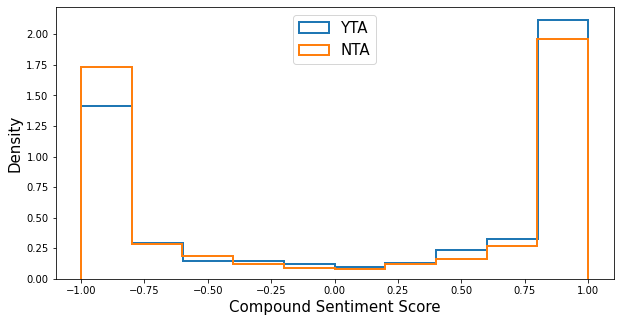

In [30]:
# Create our own axes to plot on
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot the histogram of sentiment for YTA
yta_posts.hist('sentiment',
               # Use a histogram type where it shows only the border
               histtype='step',
               # Set the line width of the histogram
               lw=2,
               # Turn the grid off
               grid=False,
               # "Density" allows us to compare multiple histograms, even if the total counts are different
               density=True,
               # Set the label for the legend
               label='YTA',
               # Be sure to use the axes we create
               ax=ax)

# Plot the histogram of sentiment for NTA
nta_posts.hist('sentiment',
               # Use a histogram type where it shows only the border
               histtype='step',
               # Set the line width of the histogram
               lw=2,
               # Turn the grid off
               grid=False,
               # "Density" allows us to compare multiple histograms, even if the total counts are different
               density=True,
               # Set the label for the legend
               label='NTA',
               # Be sure to use the axes we create
               ax=ax)
# Create legend
plt.legend(loc='upper center', prop={'size': 15})
# Create labels
plt.xlabel('Compound Sentiment Score', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('')
plt.show()

The distributions look pretty similar, but we see that NTA posts generally have negative sentiment, while YTA posts have a little bit more positive sentiment. The distributions are also very polarizing, with many posts being assigned scores close to -1 or 1, at the extreme.

This is pretty interesting, but also a little suspicious. Are there posts that *really* have that extreme positive and negative sentiment? Now is a good point to turn back to a close reading, in order to better elucidate this difference.

Let's look at an example YTA post which VADER said had among the highest of positive sentiment:

**Content Warning:** Homophobia

In [31]:
# Sort the YTA posts by sentiment, in decreasing order, so the most positive posts are on top
print(yta_posts.sort_values('sentiment', ascending=False)['selftext'].iloc[4])

I'm a Christian and I think homosexuality (the act, not the attraction) is a sin. But the Bible says to love others and not to judge, so when my best friend came out to me in high-school and told me he was gay, I told him I was here for him.

And I really was. I was there when he came out to his parents and they kicked him out the house; I was there when he needed a place to stay and I let him crash at my house for the rest of senior year; I was there to console him when he went through various break-ups with different boyfriends; etc.

Through all this, he knew my stance on homosexuality. I never forced my views onhim, but whenever he would catch me reading my Bible, he would teasingly ask me if I thought homosexuality was a sin and that he was going to hell. I would tell him, "I don't know where you're going or where I'm going. Ultimately, that's for God to decide. As far as homosexuality, I don't think you can help who you're attracted to. But I do think you can choose who you sleep

What are some observations from this post?

- The original post is pretty clearly not positive sentiment. It probably leans a bit negative in sentiment, especially with how the OP describes the entire situation.
- OP's views on their friend's sexuality are reprehensible, but they do praise their friendship, which is likely contributing to the positive sentiment.
- There are many edits to this post. This is pretty common in AITA. Many of the edits contain "thank you", as well as a paraphrased text to OP's friend that positively characterizes their friendship.

These observations demonstrate the complexity in assigning sentiment to text, and demonstrate how close reading allows us to be more critical of the outputs provided by NLP algorithms.

## Are Edits to Posts Inflating Sentiment?

In the above example, it is likely that the sentiment analysis algorithm is picking up on these edits when assigning sentiment. That motivates another research question: does the presence of an edit correlate with a certain type of sentiment?

Often times, edits involving thanking the community for their response. It is possible that posts with edits may generally have higher sentiment.

Let's try and do a cursory analysis to test this. There are many ways we could check for edits, but a pretty simple one is if the post contains the string `'Edit:'`. Let's filter by this criteria: 

In [32]:
edit_posts = df[df['selftext'].str.contains('Edit:')]

We do the same plot as above, but now we add in the sentiment from the edited posts dataframe.

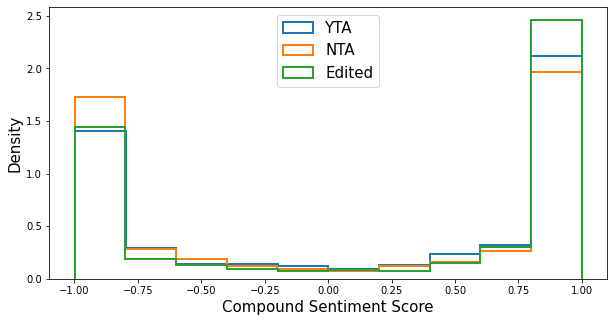

In [33]:
# Create our own axes to plot on
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot the histogram of sentiment for YTA
yta_posts.hist('sentiment',
               # Use a histogram type where it shows only the border
               histtype='step',
               # Set the line width of the histogram
               lw=2,
               # Turn the grid off
               grid=False,
               # "Density" allows us to compare multiple histograms, even if the total counts are different
               density=True,
               # Set the label for the legend
               label='YTA',
               # Be sure to use the axes we create
               ax=ax)

# Plot the histogram of sentiment for NTA
nta_posts.hist('sentiment',
               # Use a histogram type where it shows only the border
               histtype='step',
               # Set the line width of the histogram
               lw=2,
               # Turn the grid off
               grid=False,
               # "Density" allows us to compare multiple histograms, even if the total counts are different
               density=True,
               # Set the label for the legend
               label='NTA',
               # Be sure to use the axes we create
               ax=ax)

# Plot the histogram of sentiment for NTA
edit_posts.hist('sentiment',
                # Use a histogram type where it shows only the border
                histtype='step',
                # Set the line width of the histogram
                lw=2,
                # Turn the grid off
                grid=False,
                # "Density" allows us to compare multiple histograms, even if the total counts are different
                density=True,
                # Set the label for the legend
                label='Edited',
                # Be sure to use the axes we create
                ax=ax)

# Create legend
plt.legend(loc='upper center', prop={'size': 15})
# Create labels
plt.xlabel('Compound Sentiment Score', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('')
plt.show()

It definitely looks like the distribution has shifted to the right! So, we do see a correspondence between edited posts and sentiment.

🔔 **Question**: How could we improve this analysis? What other ways do OPs indicate they are updating or editing a post?

## Does Post Score Correlate with Sentiment?

Another research question we can ask, which applies to any subreddit, is whether post score correlates with sentiment. We might expect, for example, that posts with very positive or negative sentiment generally get upvoted more, since they express stronger emotions.

Let's examine this by plotting the average score of posts with sentiment values in specific ranges. You can use the following function to create this plot:

In [34]:
from scipy.stats import binned_statistic
import numpy as np

def plot_score_vs_sentiment(sentiment, score, n_bins=9):
    """Plots the average score within ranges of sentiment values.
    
    Parameters
    ----------
    sentiment : pd.Series
        The sentiment column from your dataframe.
    score : pd.Series
        The score column from your dataframe.
    n_bins : int
        The number of bins to plot.
    """
    # Calculate binned sentiment values
    bin_means, bin_edges, binnumber = binned_statistic(sentiment,
                                                       score,
                                                       statistic='mean',
                                                       bins=np.linspace(-1, 1, n_bins))
    # Calculate bin width of bar plot
    binwidth = np.ediff1d(bin_edges)[0]
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.bar(x=bin_edges[:-1] + binwidth / 2, height=bin_means, width=binwidth)
    ax.set_xlim([-1, 1])
    return fig, ax

Text(0, 0.5, 'Average Post Score')

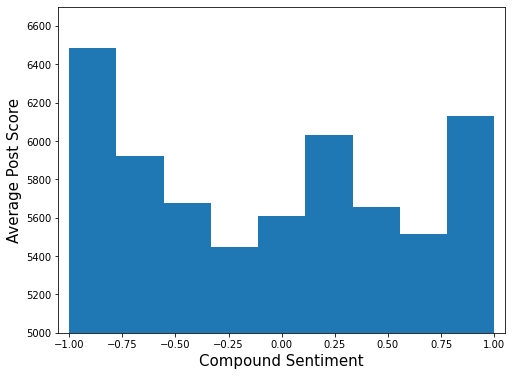

In [40]:
plot_score_vs_sentiment(df['sentiment'], df['score'], n_bins=10)
plt.xlim([-1.05, 1.05])
plt.ylim([5000, 6700])
plt.xlabel('Compound Sentiment', fontsize=15)
plt.ylabel('Average Post Score', fontsize=15)

We definitely observe a pattern: Posts with the most negative and most positive sentiment generally have higher scores!

<a id='demo1'></a>

# 🎬 Demo : Sentiment Analysis with spaCy and TextBlob

VADER is not the only tool we can use for sentiment analysis. Within spaCy, which we used for preprocessing, we can use a package called TextBlob to conduct sentiment analysis. This demo walks you through the code to use spaCy to perform sentiment analysis.

In [36]:
# Perform these installs first
%pip install textblob
%pip install spacytextblob
!python -m textblob.download_corpora

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
/Users/tomvannuenen/anaconda3/bin/python: Error while finding module specification for 'textblob.download_corpora' (ModuleNotFoundError: No module named 'textblob')


In [37]:
import numpy as np
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [38]:
# Create NLP object
nlp = spacy.load('en_core_web_sm')
# Important: we have to add textblob to our spaCy pipeline
nlp.add_pipe('spacytextblob')

In [46]:
# Apply the spaCy pipeline to each post
# This command will take a long while to run if your dataset is big
docs = list(nlp.pipe(df['selftext']))

TextBlob calculates sentiments in the variable "polarity". It also includes a variable called "subjectivity", which ranges from 0 to 1. It estimates the level of subjectivity expressed in the post (values closer to 1 are higher subjectivity).

In [47]:
# Store the polarities in a list
polarities = []
for doc in docs:
    polarities.append(doc._.polarity)
df['polarities'] = polarities

In [48]:
# Store the subjectivities in a list
subjectivities = []
for doc in docs:
    subjectivities.append(doc._.subjectivity)
df['subjectivity'] = subjectivities

In [49]:
# Get the new subsetted dataframes
yta_posts = df[df['flair_text'] == 'Asshole']
nta_posts = df[df['flair_text'] == 'Not the A-hole']

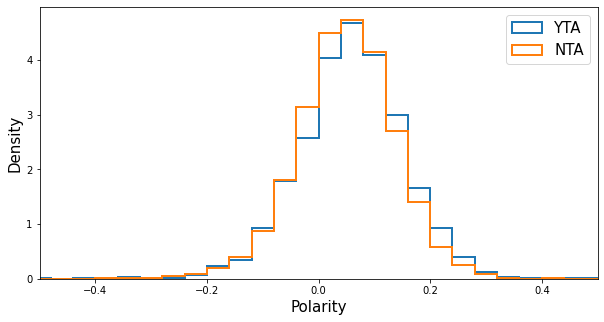

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(yta_posts['polarities'],
        density=True,
        histtype='step',
        lw=2,
        bins=np.linspace(-1, 1, 51),
        label='YTA')
ax.hist(nta_posts['polarities'],
        density=True,
        lw=2,
        histtype='step',
        bins=np.linspace(-1, 1, 51),
        label='NTA')
ax.legend(prop={'size': 15})
plt.xlim([-0.5, 0.5])
plt.xlabel('Polarity', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('')
plt.show()

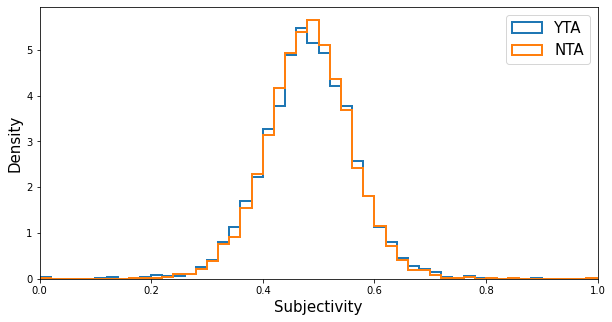

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(yta_posts['subjectivity'],
        density=True,
        histtype='step',
        lw=2,
        bins=np.linspace(0, 1, 51),
        label='YTA')
ax.hist(nta_posts['subjectivity'],
        density=True,
        lw=2,
        histtype='step',
        bins=np.linspace(0, 1, 51),
        label='NTA')
ax.legend(prop={'size': 15})
plt.xlim([0, 1])
plt.xlabel('Subjectivity', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('')
plt.show()

Notice how different the sentiment looks from VADER! We still, however, observe that YTA posts generally have a slightly higher sentiment than NTA posts.

<div class="alert alert-success">

## ❗ Key Points

* Sentiment analysis aims to characterize the emotional state of text.
* The package VADER can be used to easily calculate sentiment on posts. 
* Sentiment analyses can facilitate interrogations of the dataset.
* Different packages might give generate sentiments.
    
</div>